In [1]:
%cd ..

/Users/ivallesp/PycharmProjects/somnium


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus
from somnium.visualization import plot_umatrix

In [3]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*3,
              random=10+np.random.randn(10000)
              ))

data = df.values
names = df.columns

In [4]:
df.head()

,weight,height,BMI,fat,random
0,65.447949,179.953359,1.420795,25.342487,8.439558
1,88.412870,175.420819,2.019801,32.498915,9.401421
2,79.397433,190.306363,1.541186,22.146801,8.744034
3,72.568174,190.756326,1.401986,21.846998,10.133520
4,84.424394,173.652918,1.968154,27.590708,9.684672


E_Quantization = 0.3602623151753118
E_Topographic = 0.012599999999999945


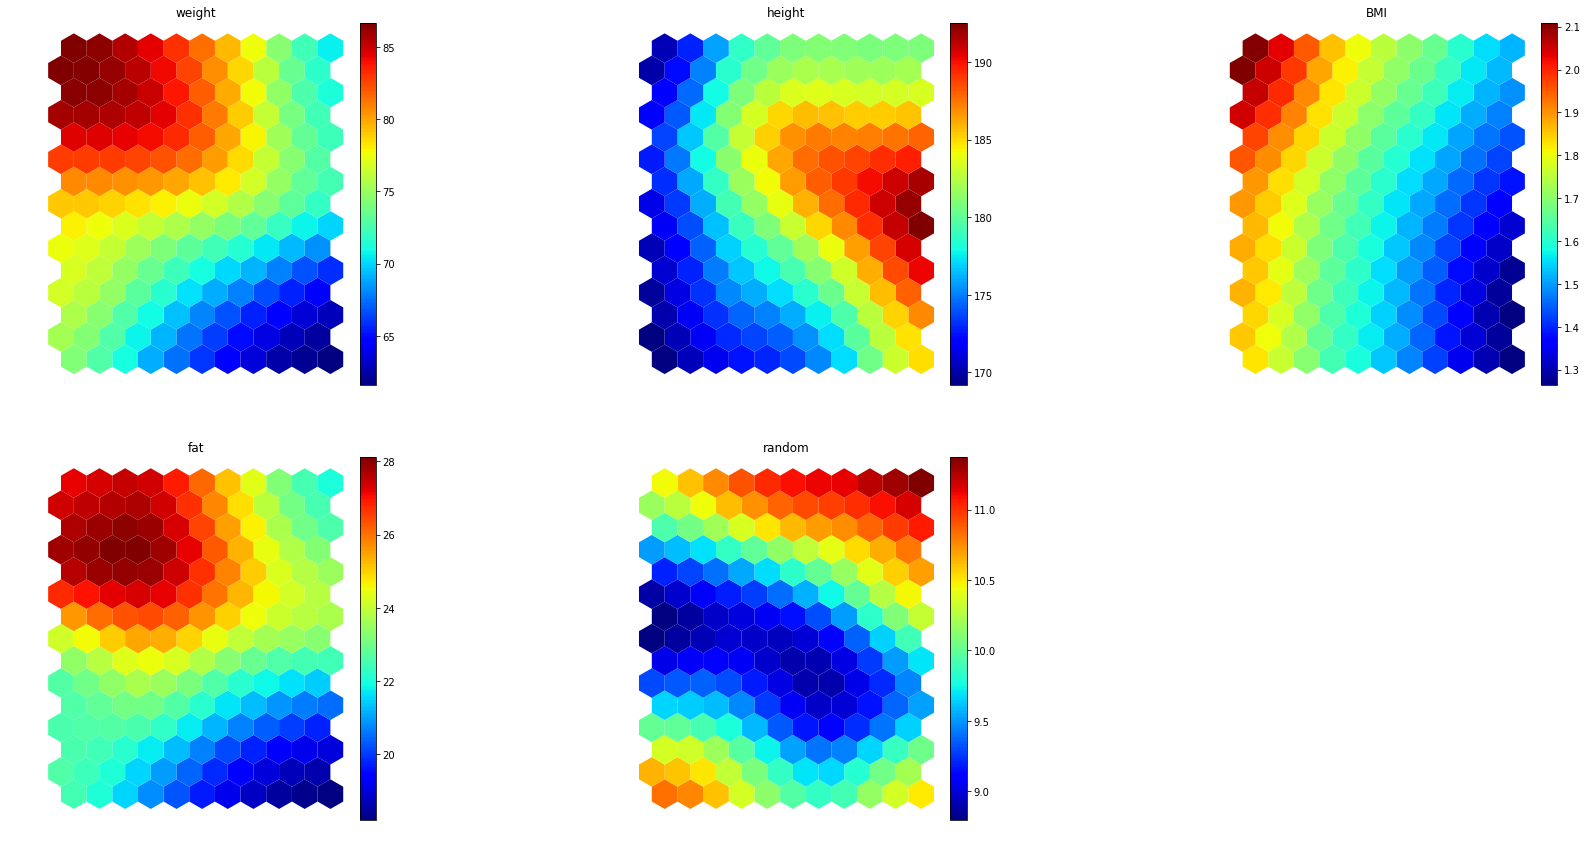

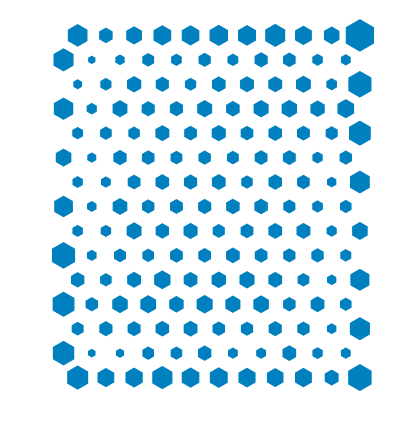

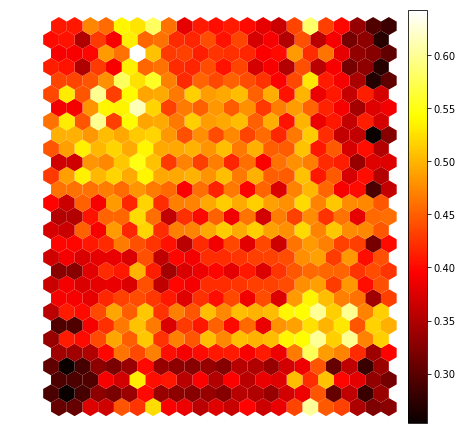

In [5]:
model = SOM(lattice="hexa", normalization="standard", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 11], n_jobs=1)

model.fit(data, 10, 30, 10)
model.fit(data, 30, 10, 3)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

E_Quantization = 0.4115769868056126
E_Topographic = 0.06899999999999995


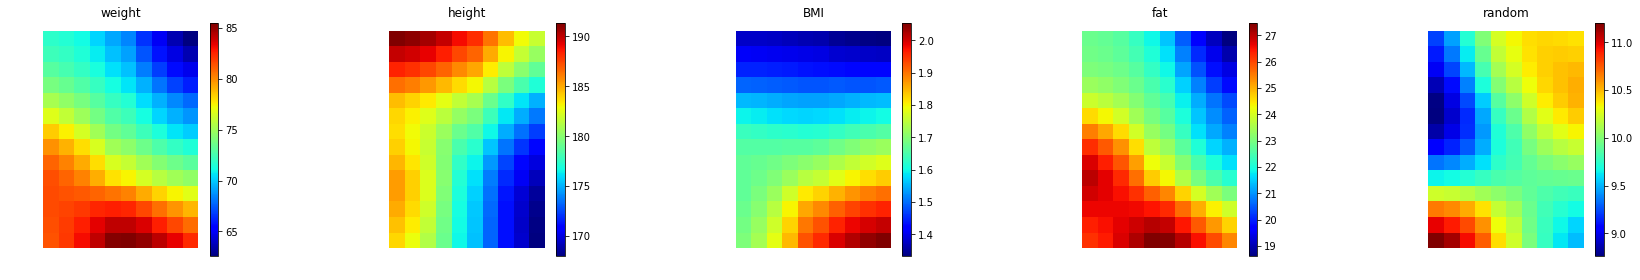

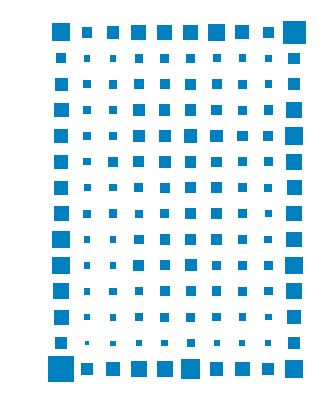

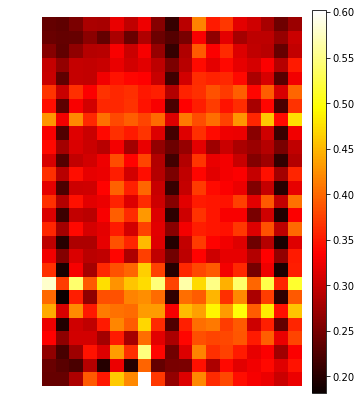

In [6]:
model = SOM(lattice="rect", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[14, 10])

model.fit(data, 10, 30, 10)
model.fit(data, 10, 10, 4)
print("E_Quantization =", model.calculate_quantization_error())

print("E_Topographic =", model.calculate_topographic_error())

plot_components(model=model, names=names, figure_width=30, max_subplot_columns=5)
plot_bmus(model, figure_width=10)
plot_umatrix(model=model, colormap = plt.cm.hot, figure_width=10)